### Linear Regression

### Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Data Set

In [2]:
df = pd.read_csv('../Data/Linear.csv')
df.head()

,x,y
0,0.000000,-51.000000
1,25.000000,-12.000000
2,117.583220,134.907414
3,108.922466,134.085179
4,69.887445,NaN


### Remove Missing Data or Impute Missing Data with Relevant Data

In [3]:
df.isna().sum()

x    0
y    8
dtype: int64

In [4]:
print(f'Dimensions of Data : {df.shape}')

Dimensions of Data : (102, 2)


In [5]:
df.dropna(how='any', inplace=True)

In [6]:
df.isna().sum()

x    0
y    0
dtype: int64

In [7]:
print(f'Dimensions of Data after Dropping Missing Data : {df.shape}')

Dimensions of Data after Dropping Missing Data : (94, 2)


### Arrange Data into Feature Matrix and Target Vector 

In [8]:
X = df.loc[:,['x']]
y = df.loc[:, 'y']

### Converting into NumPy Array

In [9]:
X_array = X.values
y_array = y.values

### Create an Instance of Linear Regression

In [10]:
reg = LinearRegression(fit_intercept=True)

In [11]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean 

In [12]:
reg.fit(X, y)

LinearRegression()

### Predict the Observations

In [13]:
reg.predict(X[:10])

array([-50.99119328, -11.39905237, 135.223663  , 121.50775193,
       102.37289634,  31.0056196 ,   4.46431068,  74.84474012,
        20.82088826,  72.16749711])

In [14]:
print(f'Score : {reg.score(X,y)*100:.2f}%')

Score : 97.99%


In [15]:
reg.fit(X_array, y_array)

LinearRegression()

### Benefit of Converting to Array is that we can Predict for Single Observation.

In [16]:
reg.predict(X_array[0].reshape(-1,1))

array([-50.99119328])

In [17]:
reg.predict(X_array[:10])

array([-50.99119328, -11.39905237, 135.223663  , 121.50775193,
       102.37289634,  31.0056196 ,   4.46431068,  74.84474012,
        20.82088826,  72.16749711])

In [18]:
print(f'Score : {reg.score(X_array, y_array)*100:.2f}%')

Score : 97.99%


### Equation of Regression

In [19]:
print(f'Slope : {reg.coef_}')

Slope : [1.58368564]


In [20]:
print(f'Intercept : {reg.intercept_}')

Intercept : -50.991193283333985


In [21]:
m = reg.coef_[0]
c = reg.intercept_
print(f'y = {m:.2f}x + {c:.2f}')

y = 1.58x + -50.99


### Plotting the Best Fit Line

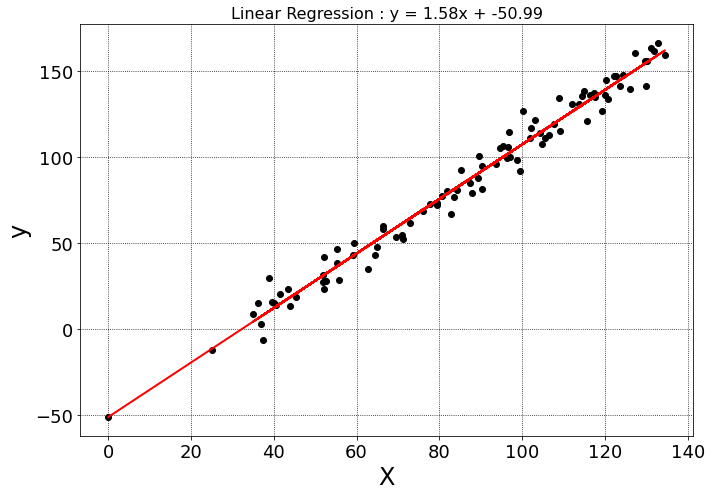

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,7))

ax.scatter(X_array,y_array, color='black');
ax.plot(X_array, reg.predict(X_array), color='red', linewidth=2)
ax.grid(True, 
        axis='both', 
        zorder=0, 
        linestyle=':', 
        color='k')
ax.tick_params(labelsize=18)
ax.set_xlabel('X', fontsize=24)
ax.set_ylabel('y', fontsize=24)
ax.set_title(f'Linear Regression : y = {m:.2f}x + {c:.2f}', fontsize=16)
fig.tight_layout();

### Plotting Models with and without Intercept

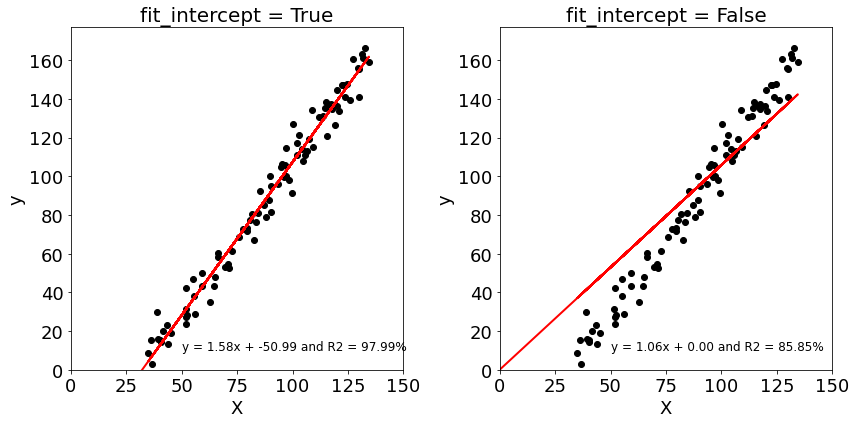

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

for i, model in enumerate([LinearRegression(fit_intercept=True), LinearRegression(fit_intercept=False)]):
    model.fit(X,y)
    predict = model.predict(X)
    score = model.score(X,y)
    m = model.coef_[0]
    c = model.intercept_
    
    ax[i].scatter(X,y, color = 'black')
    ax[i].plot(X, model.predict(X), color = 'red', linewidth = 2)
    ax[i].tick_params(labelsize = 18)
    ax[i].set_xlabel('X', fontsize = 18)
    ax[i].set_ylabel('y', fontsize = 18)
    ax[i].set_xlim(left = 0, right = 150)
    ax[i].set_ylim(bottom = 0)
    ax[i].text(50,10, f'y = {m:.2f}x + {c:.2f} and R2 = {score*100:.2f}%', fontsize=12)

ax[0].set_title('fit_intercept = True', fontsize=20)    
ax[1].set_title('fit_intercept = False', fontsize=20)    
fig.tight_layout();